<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Lung_cancer_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/survey%20lung%20cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
print(df.shape)

(309, 16)


In [ ]:
# Iterate through each column and display unique values
for col in df.columns:
    print(f"Unique values in column '{col}':")
    if df[col].nunique() < 20:
        print(df[col].unique())
    else:
        print(df[col].value_counts().head()) # Show top frequent values
    print("-" * 20)

Unique values in column 'GENDER':
['M' 'F']
--------------------
Unique values in column 'AGE':
AGE
64    20
56    19
63    19
62    18
60    17
Name: count, dtype: int64
--------------------
Unique values in column 'SMOKING':
[1 2]
--------------------
Unique values in column 'YELLOW_FINGERS':
[2 1]
--------------------
Unique values in column 'ANXIETY':
[2 1]
--------------------
Unique values in column 'PEER_PRESSURE':
[1 2]
--------------------
Unique values in column 'CHRONIC DISEASE':
[1 2]
--------------------
Unique values in column 'FATIGUE ':
[2 1]
--------------------
Unique values in column 'ALLERGY ':
[1 2]
--------------------
Unique values in column 'WHEEZING':
[2 1]
--------------------
Unique values in column 'ALCOHOL CONSUMING':
[2 1]
--------------------
Unique values in column 'COUGHING':
[2 1]
--------------------
Unique values in column 'SHORTNESS OF BREATH':
[2 1]
--------------------
Unique values in column 'SWALLOWING DIFFICULTY':
[2 1]
--------------------
Uni

1. Basic Cleaning

In [ ]:
# Missing values per column
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("Total missing values in all columns:", missing_per_column.sum())

missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
Total missing values in all columns: 0
Missing values per row:
0      0
1      0
2      0
3      0
4      0
      ..
304    0
305    0
306    0
307    0
308    0
Length: 309, dtype: int64
Total missing values in all rows: 0
Total missing values in the dataset: 0


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

Duplicate rows (True means duplicate):
0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool
Total number of duplicate rows: 33


In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

# Remove exact duplicates
df.drop_duplicates(inplace=True)

# Verify removal
print("Remaining duplicate rows:", df.duplicated().sum())

duplicates = df[df.duplicated(keep=False)]
duplicates.to_csv("removed_duplicates.csv", index=False)

Remaining duplicate rows: 0


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


2. Feature Visualization

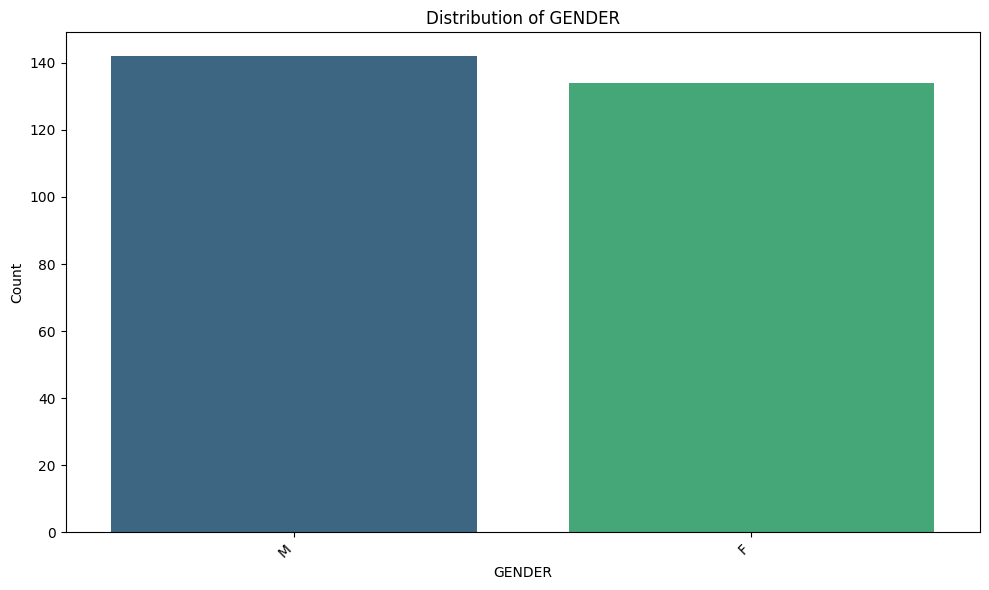

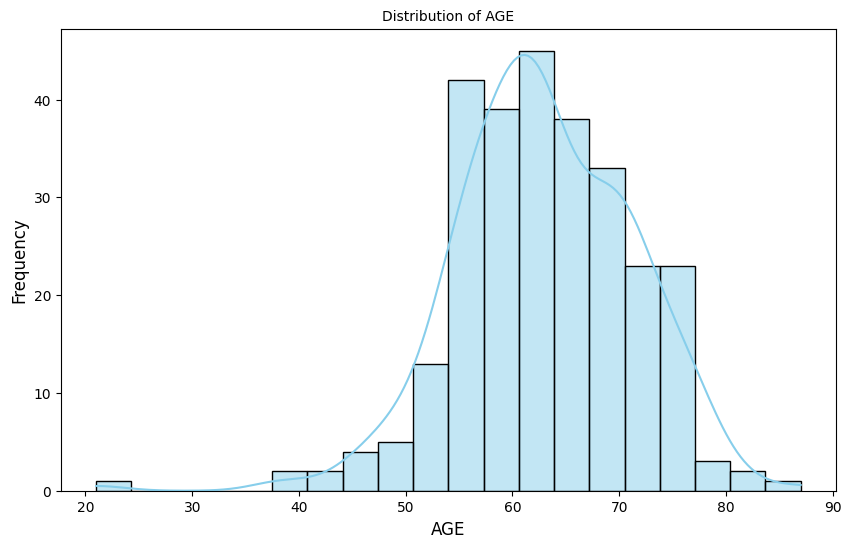

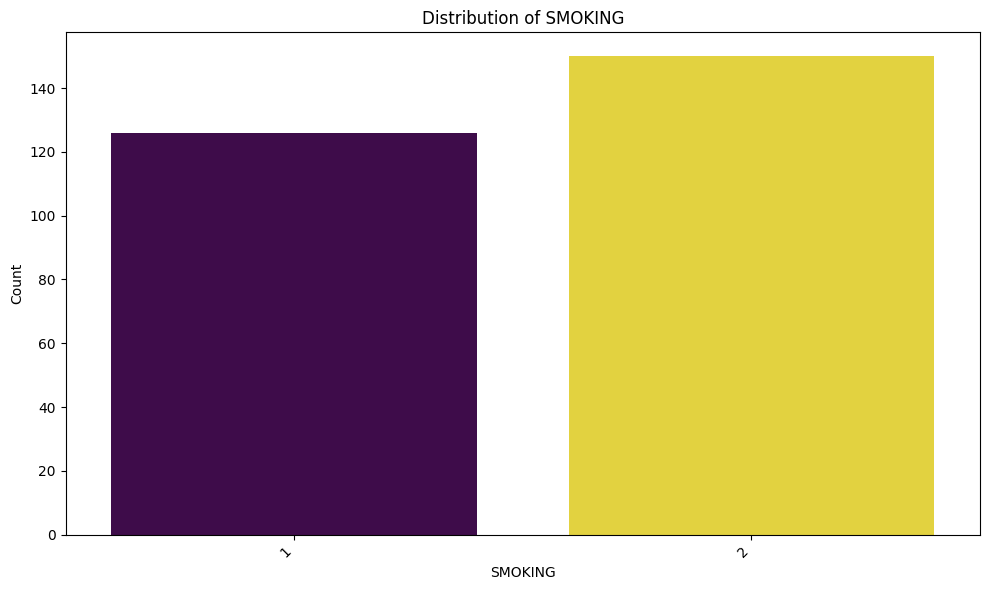

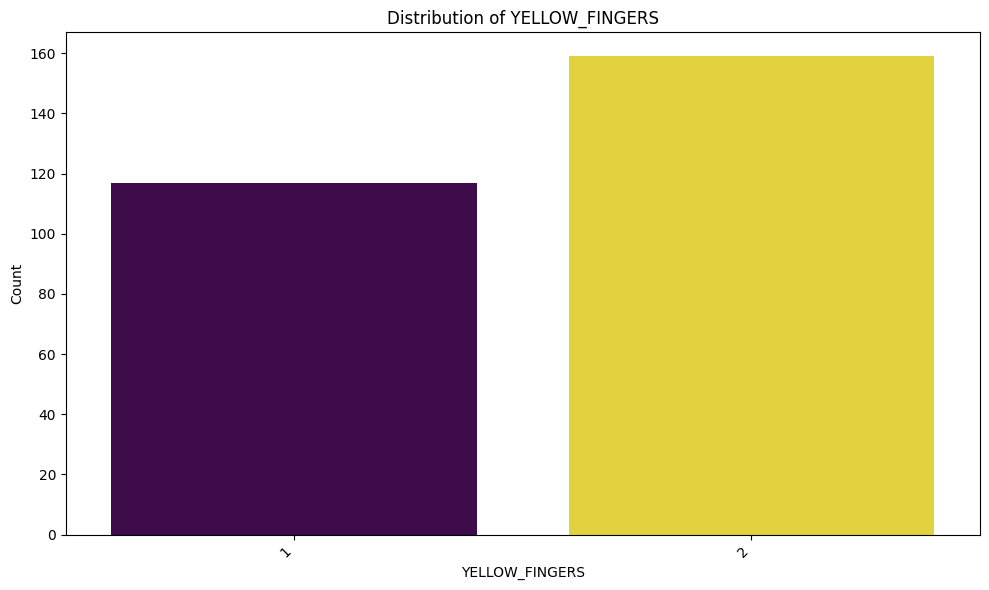

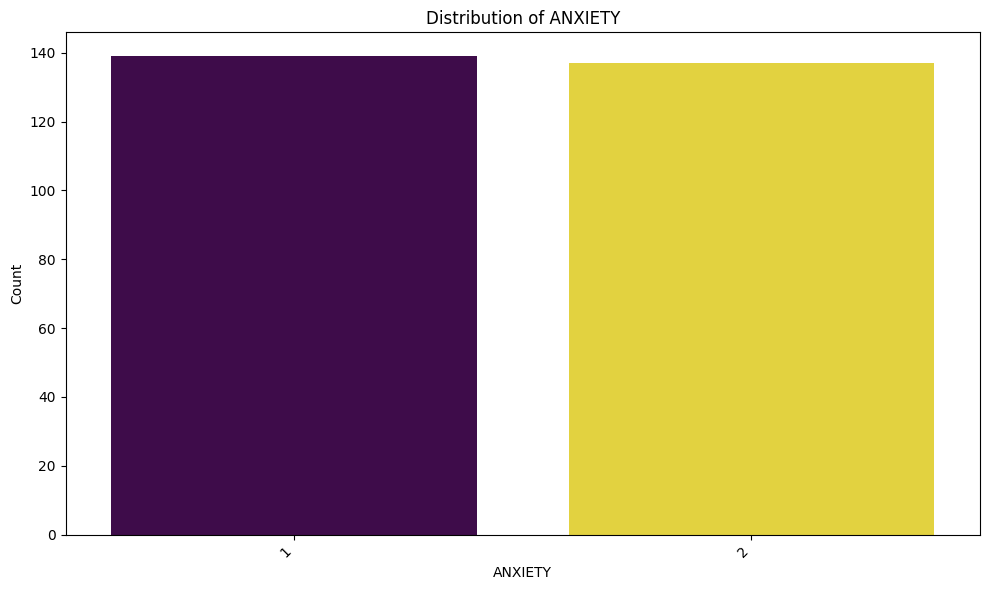

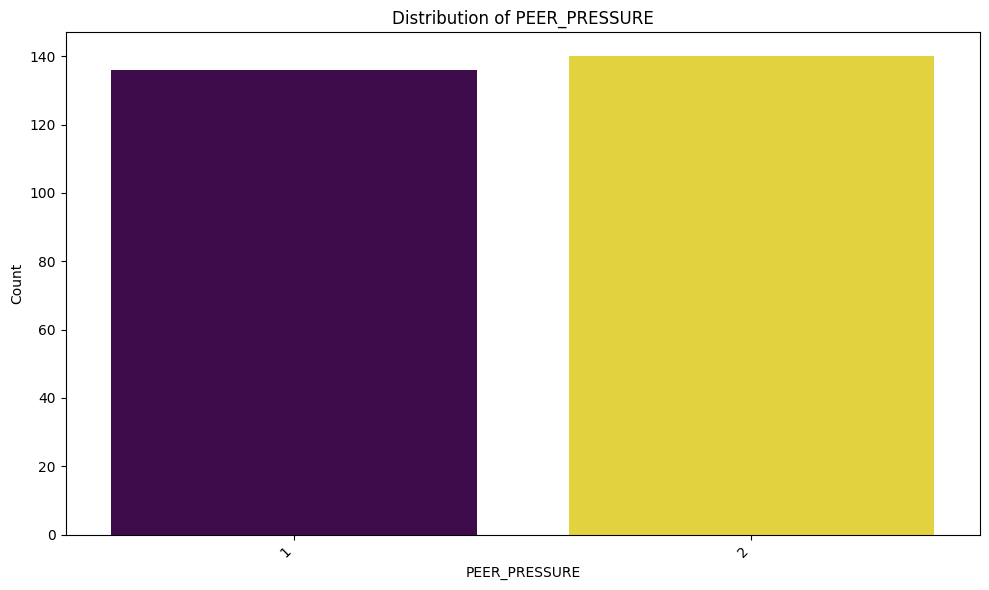

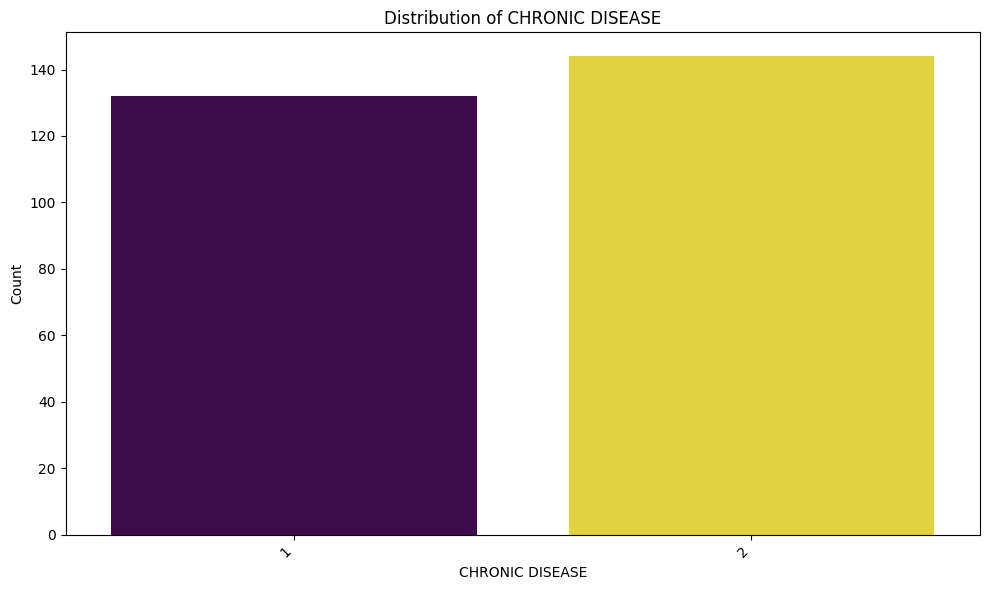

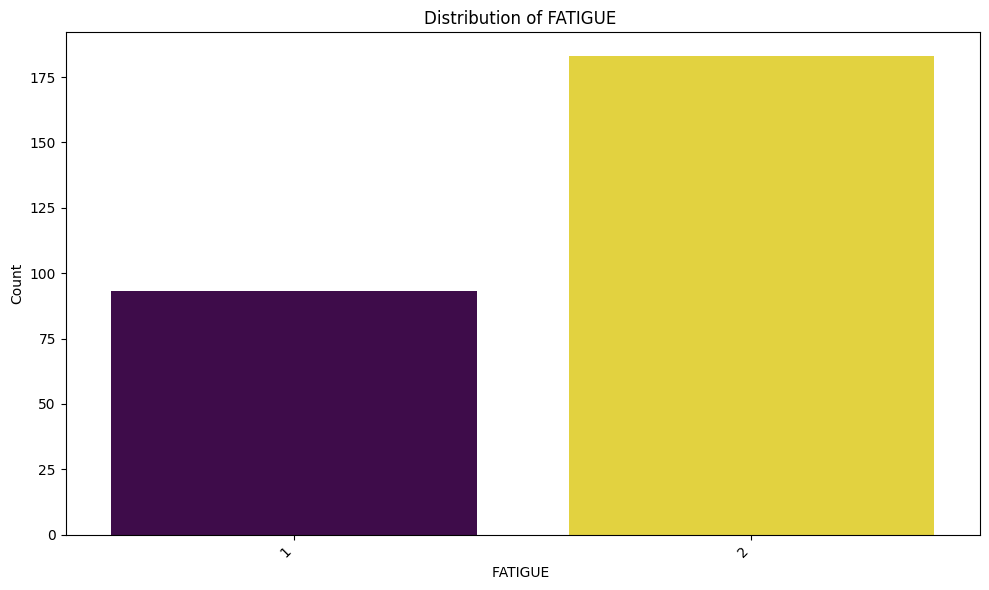

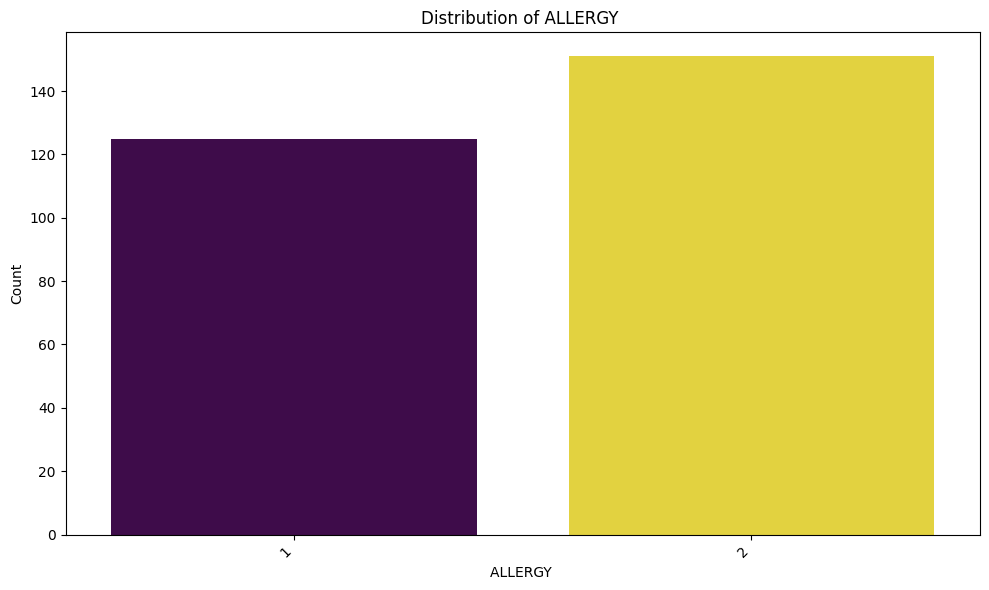

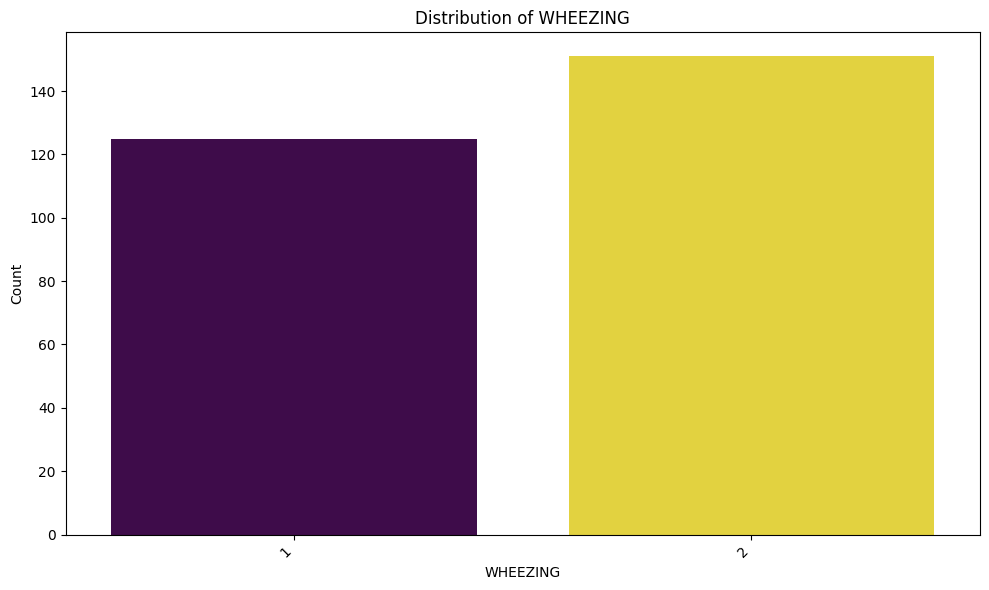

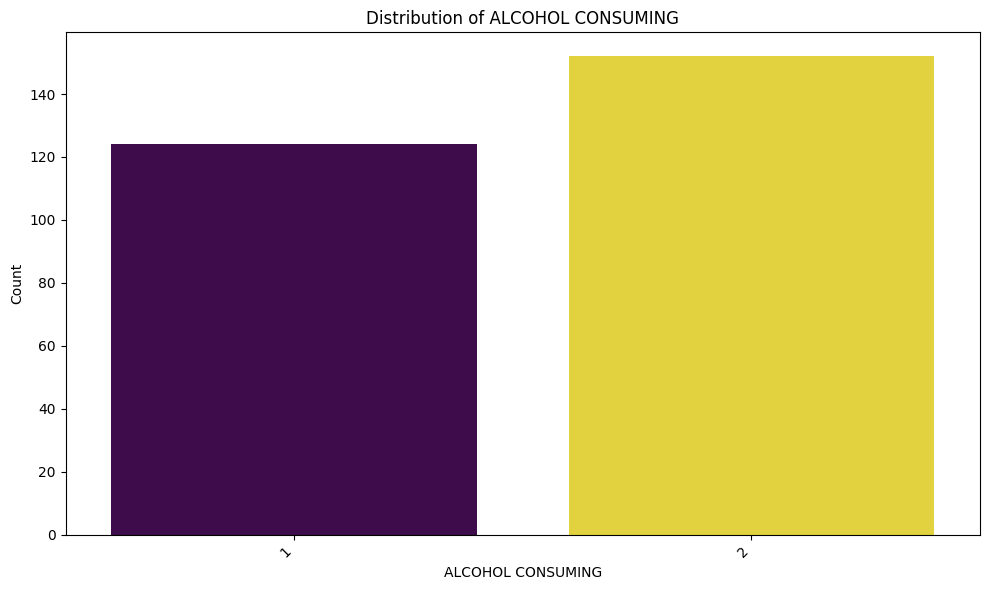

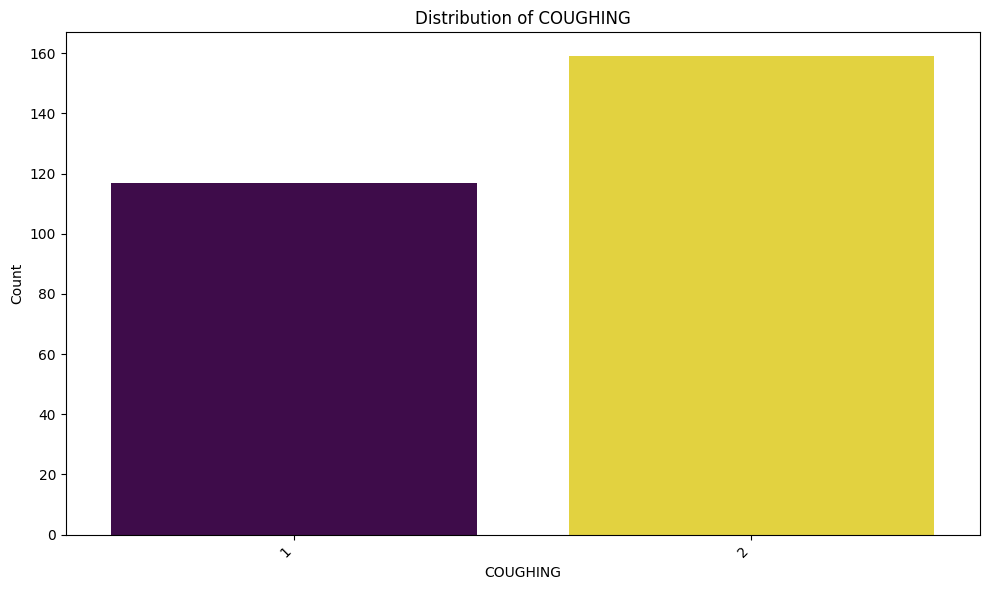

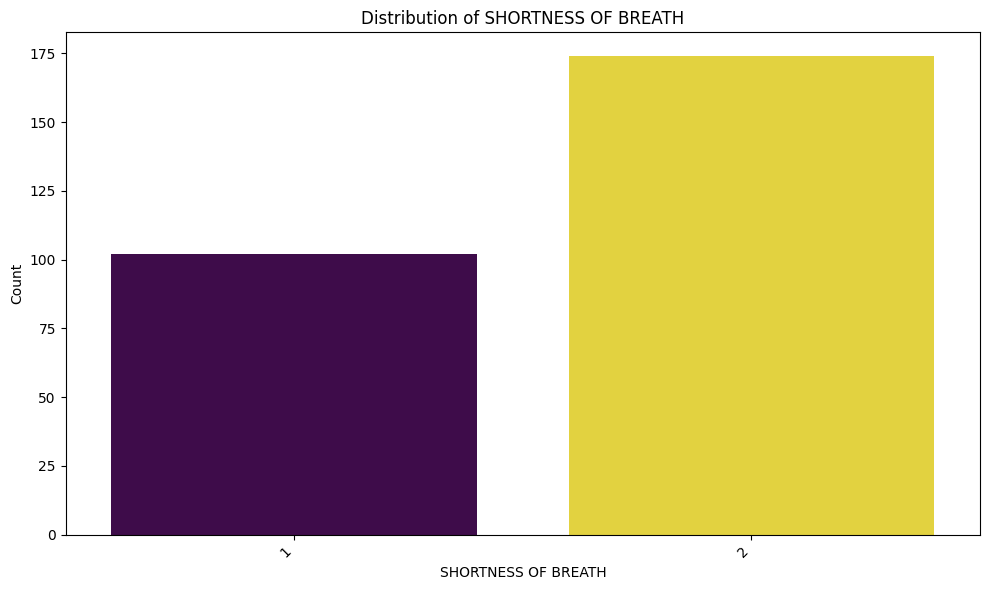

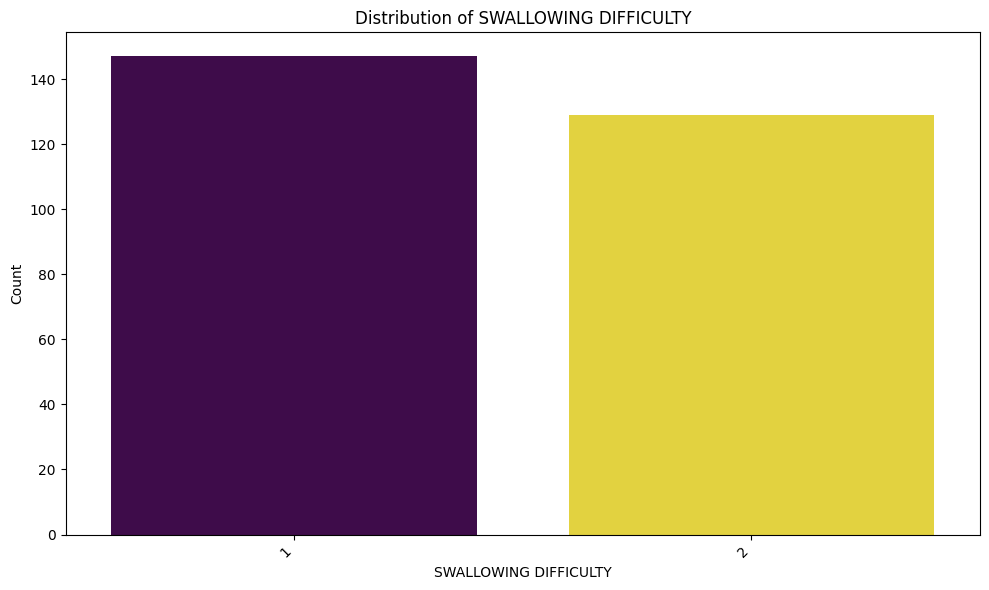

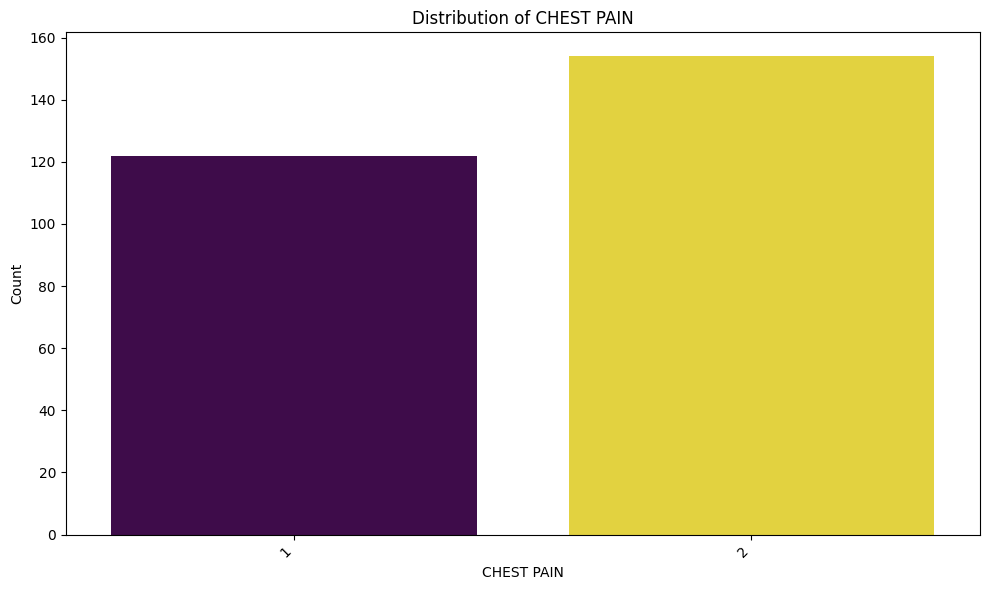

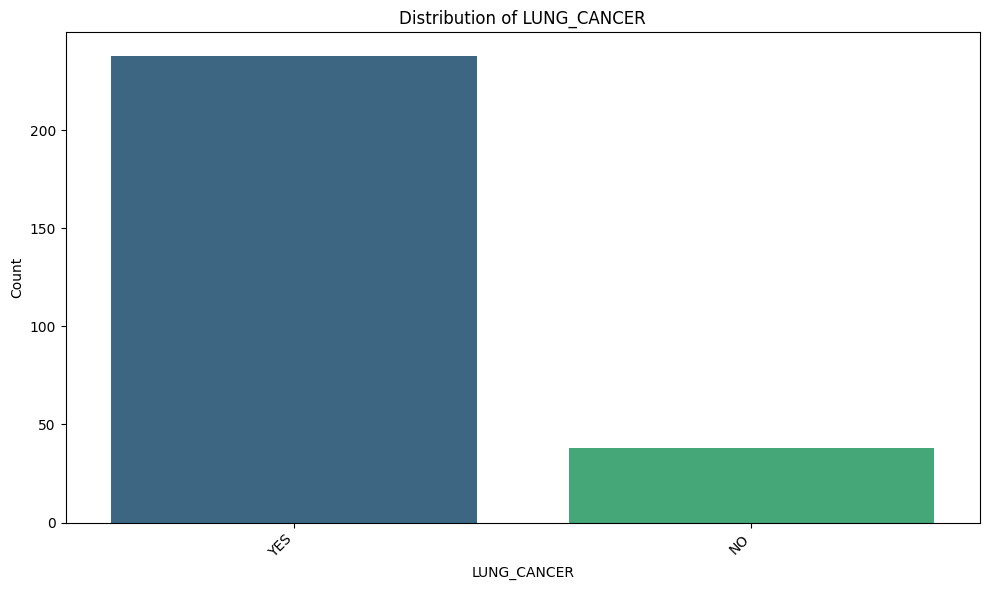

In [ ]:
# Visualize individual features
for column in df.columns:
    plt.figure(figsize=(10, 6))
    if df[column].dtype == 'object' or df[column].nunique() <= 10:
        sns.countplot(x=column, data=df, palette='viridis', hue=column, legend=False)
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
    else: # Numerical
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'Distribution of {column}', fontsize=10)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    plt.show()

Observations from Feature Visualization:

*   **Gender:** There are more male participants than female participants in the dataset.
*   **Age:** The age distribution appears to be somewhat normally distributed, with a peak around 60-70 years old.
*   **Smoking, Yellow Fingers, Anxiety, Peer Pressure, Chronic Disease, Fatigue, Allergy, Wheezing, Alcohol Consuming, Coughing, Shortness of Breath, Swallowing Difficulty, Chest Pain:** These features are binary (1 or 2), indicating the presence or absence of a symptom or characteristic. The distribution varies for each feature, showing the frequency of each category.
*   **Lung Cancer:** The dataset has an imbalanced target variable, with significantly more participants having lung cancer (YES) than not having lung cancer (NO). This is an important observation for model building, as it might require handling class imbalance.

3. Encoding Processes

In [ ]:
# Encode categorical features
le = LabelEncoder()
df_encoded = df.copy() # Create a copy to avoid modifying the original dataframe
df_encoded['GENDER'] = le.fit_transform(df_encoded['GENDER'])
df_encoded['LUNG_CANCER'] = le.fit_transform(df_encoded['LUNG_CANCER'])

display(df_encoded.head())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


4. Spearman Correlation Heatmap

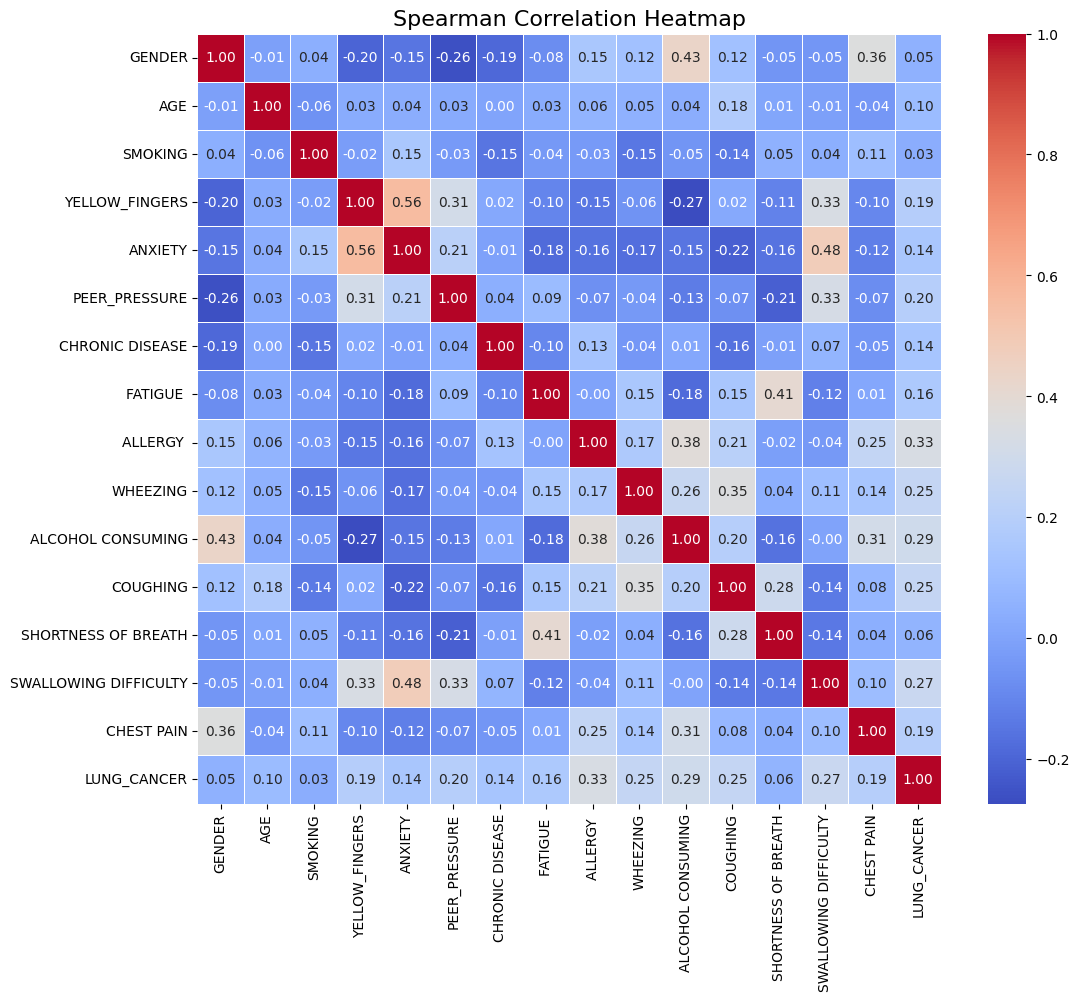

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr = df_encoded.corr(method='spearman')
# Find highly correlated features (absolute correlation > 0.8)
threshold = 0.8
highly_correlated_features = set()
for i in range(len(spearman_corr.columns)):
    for j in range(i):
        if abs(spearman_corr.iloc[i, j]) > threshold:
            colname_i = spearman_corr.columns[i]
            colname_j = spearman_corr.columns[j]
            highly_correlated_features.add(f"{colname_i} - {colname_j}: {spearman_corr.iloc[i, j]:.2f}")

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.show()

No highly correlated features observed from the heatmap

In [ ]:
# Calculate variance for each feature
variances = df_encoded.var()

# Define a threshold for low variance (this might need adjustment based on the data)
low_variance_threshold = 0.01 # Example threshold - adjust if needed

# Identify features with variance below the threshold
low_variance_features = variances[variances < low_variance_threshold].index.tolist()

print("Features with extremely low variance:")
print(low_variance_features)

# For example, to drop them:
# display(df_reduced.head())

Features with extremely low variance:
[]


In [ ]:
# Save the processed DataFrame to a new CSV file
df_encoded.to_csv('processed_lung_cancer_data.csv', index=False)

print("Processed data saved to 'processed_lung_cancer_data.csv'")

Processed data saved to 'processed_lung_cancer_data.csv'
